In [361]:
%matplotlib inline
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pylab as plt

In [362]:
patient = pd.read_csv('../data/raw/training/p020637.psv', sep='|')

In [363]:
patient

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,61.0,96.0,NaN,NaN,117.0,NaN,13.0,NaN,NaN,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,2,0
1,65.5,95.5,36.00,NaN,137.0,NaN,15.0,NaN,NaN,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,3,0
2,80.0,97.0,NaN,NaN,128.0,NaN,18.0,NaN,-5.0,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,4,0
3,88.0,100.0,35.39,NaN,NaN,NaN,14.0,NaN,-5.0,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,5,0
4,80.0,96.0,NaN,NaN,121.5,NaN,20.0,NaN,NaN,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,114.0,96.0,NaN,105.0,77.0,63.0,29.0,NaN,-7.0,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,139,1
138,119.0,95.0,NaN,102.0,75.0,62.0,30.0,NaN,-6.0,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,140,1
139,119.0,95.0,37.72,113.0,81.0,66.0,31.0,NaN,-6.0,NaN,...,NaN,NaN,NaN,60.66,1,1,0,-0.02,141,1
140,116.0,96.0,NaN,97.0,71.0,58.0,32.0,NaN,-6.0,17.0,...,28.2,NaN,369.0,60.66,1,1,0,-0.02,142,1


In [364]:
original_index = np.array(patient['BUN'].index.tolist()).reshape(-1,1)

Lets try to smooth out BUN

In [365]:
patient['BUN'][patient['BUN'].isna()]

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
135   NaN
136   NaN
137   NaN
138   NaN
139   NaN
Name: BUN, Length: 117, dtype: float64

In [366]:
patient.isna().sum()

HR                    2
O2Sat                 2
Temp                106
SBP                  58
MAP                   2
DBP                  58
Resp                  1
EtCO2               142
BaseExcess          115
HCO3                115
FiO2                109
pH                  115
PaCO2               127
SaO2                142
AST                 142
BUN                 117
Alkalinephos        142
Calcium             129
Chloride            115
Creatinine          129
Bilirubin_direct    142
Glucose             129
Lactate             135
Magnesium           117
Phosphate           129
Potassium           115
Bilirubin_total     142
TroponinI           142
Hct                 128
Hgb                 128
PTT                 140
WBC                 128
Fibrinogen          142
Platelets           135
Age                   0
Gender                0
Unit1                 0
Unit2                 0
HospAdmTime           0
ICULOS                0
SepsisLabel           0
dtype: int64

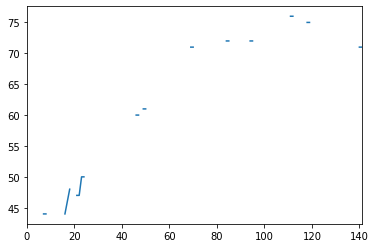

In [367]:
patient['BUN'].plot()

In [368]:
patient['BUN'].dropna(inplace=True)

In [369]:
patient['BUN'].values

array([44., 44., 44., 46., 48., 47., 47., 50., 50., 60., 60., 61., 61.,
       71., 71., 72., 72., 72., 72., 76., 76., 75., 75., 71., 71.])

In [370]:
y = patient['BUN'].values
X = np.array(patient['BUN'].index.tolist()).reshape(-1,1)
x = np.atleast_2d(np.linspace(0, 141, 1000)).T

In [371]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [372]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(10, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9,normalize_y=True)
# Fit to data using Maximum Likelihood Estimation of the parameters
gp.fit(X, y)

# Make the prediction on the meshed x-axis (ask for MSE as well)
y_pred, sigma = gp.predict(x, return_std=True)

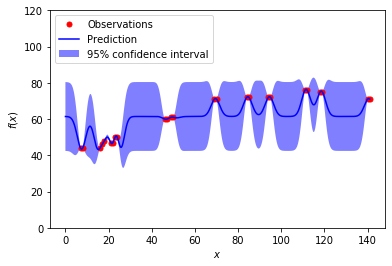

In [373]:
# Plot the function, the prediction and the 95% confidence interval based on
# the MSE
plt.figure()
plt.plot(X, y, 'r.', markersize=10, label='Observations')
plt.plot(x, y_pred, 'b-', label='Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([y_pred - 1.9600 * sigma,
                        (y_pred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')

plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.ylim(0, 120)


plt.legend(loc='upper left')


Lets look a little closer

In [374]:
x_test = np.array([[60],[73]])
gp.predict(x_test, return_std=True)

(array([61.44014464, 63.66456853]), array([9.69349222, 8.70941415]))

## Now we can fill in our column

In [375]:
patient['BUN'] = gp.predict(original_index)

In [376]:
patient['BUN'].isna().sum()

0

In [377]:
patient["BUN"]

0      61.421429
1      61.336166
2      60.988066
3      59.906255
4      57.374677
         ...    
137    63.664568
138    66.055203
139    68.940914
140    71.000000
141    71.000000
Name: BUN, Length: 142, dtype: float64